# Exercícios 

Você recebeu o arquivo **DESCRITORESMATH.csv**. Ele contém as notas, por descritores, para avaliação das escolas do estado do Ceará. Existe um atributo chamado **'Indicação do Padrão de Desempenho'** que classifica a escola.

Crie um dataframe apenas com os descritores de avaliação. Aplique o método PPS e verifique, através de uma **maximum spanning tree** os descritores mais centrais na predição entre as variáveis. 






In [4]:
import pandas as pd 
import seaborn as sns 

In [23]:
import gdown
import os

file = 'https://drive.google.com/file/d/1-NIsWOWYCGxbsDXfbE8X-Z7BmKfv1ldv'
output = 'DESCRITORESMATH.csv'

if not os.path.exists(output):
    print(f"File {output} not found. Downloading...")
    fileId = file.split('/')[-1]
    url = 'https://drive.google.com/uc?id=' + fileId
    gdown.download(url, output, quiet=False)
else:
    print(f"File {output} already exists. No download needed.")



File DESCRITORESMATH.csv already exists. No download needed.


In [6]:
df=pd.read_csv('DESCRITORESMATH.csv')

In [7]:
df

,D16,D19,D20,D24,D28,D40,D42,D49,D50,D51,...,D64,D65,D67,D71,D72,D76,D78,Indicação do Padrão de Desempenho,Município,Escola
0,33.1,33.8,20.0,29.6,6.4,25.5,37.0,38.3,21.6,23.3,...,25.4,27.5,22.8,25.4,28.1,86.4,25.5,Crítico,AQUIRAZ,LIA SIDOU EEM
1,24.0,30.9,20.7,19.1,13.6,10.7,47.6,20.4,25.5,22.8,...,15.0,22.4,20.3,32.7,21.2,86.2,26.0,Crítico,AQUIRAZ,EEM LIA SIDOU
2,30.2,31.9,23.8,25.5,33.3,38.7,41.3,19.0,17.5,16.1,...,33.3,25.4,23.4,17.0,37.1,74.6,40.3,Crítico,AQUIRAZ,EEM LIA SIDOU
3,37.1,34.1,19.8,26.1,23.3,26.9,34.2,35.3,20.2,25.8,...,37.1,28.4,23.5,12.2,28.9,93.8,50.0,Crítico,AQUIRAZ,LIA SIDOU EEMTI
4,12.4,36.1,19.7,10.2,13.6,24.6,33.7,40.6,25.2,29.6,...,21.0,27.2,20.0,17.6,32.1,82.3,15.1,Muito Crítico,CAUCAIA,EEFM DOM ALOISIO LORSCHEIDER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,43.5,38.0,24.5,25.4,14.4,14.7,37.4,27.6,24.0,27.6,...,36.5,30.9,29.5,17.8,27.5,84.1,52.7,Crítico,FORTALEZA,EEM LICEU DO CONJUNTO CEARA
2468,21.9,37.5,16.0,34.6,16.7,26.1,60.0,34.1,27.9,21.2,...,33.3,35.0,16.7,35.5,29.4,90.9,41.7,Crítico,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS
2469,28.8,27.1,16.1,19.1,16.4,4.8,48.3,26.2,21.7,13.6,...,35.0,20.6,18.3,20.9,18.0,85.5,23.7,Crítico,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS
2470,40.9,40.9,17.2,31.8,29.2,46.7,40.4,17.8,25.8,23.3,...,35.3,18.0,15.1,10.0,27.5,77.4,38.5,Crítico,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS


In [8]:
features = df.columns[0:-3]
target = df.columns[-3]

<Axes: >

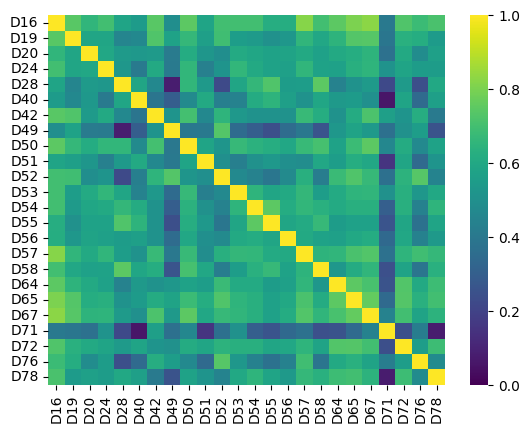

In [9]:
sns.heatmap(df[features].corr(),cmap='viridis',vmin=0,vmax=1)

In [10]:
df['Indicação do Padrão de Desempenho'].value_counts()

Crítico          1710
Muito Crítico     423
Intermediário     306
Adequado           33
Name: Indicação do Padrão de Desempenho, dtype: int64

In [11]:
import ppscore as pps

In [12]:
pps.score(df,'D16','D19')

{'x': 'D16',
 'y': 'D19',
 'ppscore': 0.16706216936637353,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 7.708495145631067,
 'model_score': 6.420697224051782,
 'model': DecisionTreeRegressor()}

In [13]:
pps.score(df,'D19','D16')

{'x': 'D19',
 'y': 'D16',
 'ppscore': 0.27778478256190686,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 12.723422330097085,
 'model_score': 9.189049224687755,
 'model': DecisionTreeRegressor()}

In [14]:
daux=pps.matrix(df[features])
daux[(daux.ppscore>=0.1)&(daux.ppscore<0.95)]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
1,D16,D19,0.167062,regression,True,mean absolute error,7.708495,6.420697,DecisionTreeRegressor()
3,D16,D24,0.131747,regression,True,mean absolute error,6.691545,5.809951,DecisionTreeRegressor()
6,D16,D42,0.179116,regression,True,mean absolute error,11.255542,9.239492,DecisionTreeRegressor()
8,D16,D50,0.203974,regression,True,mean absolute error,6.671561,5.310738,DecisionTreeRegressor()
10,D16,D52,0.171113,regression,True,mean absolute error,10.959021,9.083791,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
552,D78,D16,0.201456,regression,True,mean absolute error,12.723422,10.160211,DecisionTreeRegressor()
567,D78,D57,0.143124,regression,True,mean absolute error,10.233172,8.768564,DecisionTreeRegressor()
569,D78,D64,0.146820,regression,True,mean absolute error,7.535558,6.429190,DecisionTreeRegressor()
570,D78,D65,0.180809,regression,True,mean absolute error,7.973625,6.531920,DecisionTreeRegressor()


In [15]:
df_aux = df[features];
df_aux['TARGET'] = df[target]

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_37344/1022963091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['TARGET'] = df[target]


In [16]:
import networkx as nx
dpps=pps.matrix(df_aux)

dpps

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,D16,D16,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,D16,D19,0.167062,regression,True,mean absolute error,7.708495,6.420697,DecisionTreeRegressor()
2,D16,D20,0.058680,regression,True,mean absolute error,5.580138,5.252695,DecisionTreeRegressor()
3,D16,D24,0.131747,regression,True,mean absolute error,6.691545,5.809951,DecisionTreeRegressor()
4,D16,D28,0.000000,regression,True,mean absolute error,7.236772,7.238859,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
620,TARGET,D71,0.064101,regression,True,mean absolute error,7.265615,6.799885,DecisionTreeRegressor()
621,TARGET,D72,0.259256,regression,True,mean absolute error,6.756189,5.004604,DecisionTreeRegressor()
622,TARGET,D76,0.246165,regression,True,mean absolute error,7.409264,5.585361,DecisionTreeRegressor()
623,TARGET,D78,0.255194,regression,True,mean absolute error,9.632282,7.174181,DecisionTreeRegressor()


In [17]:
G=nx.from_pandas_edgelist(dpps,'x','y','ppscore',create_using=nx.DiGraph())

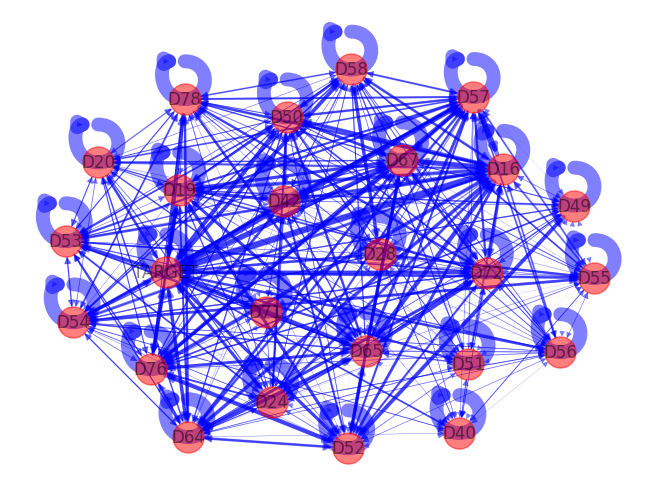

In [18]:
nx.draw(G,node_color='red',with_labels = True,width=dpps.ppscore.values*10,node_size=500,edge_color='blue',alpha=0.5)

In [19]:
source=[]
target2=[]
weight=[]
for a,b in nx.maximum_spanning_arborescence(G,attr='ppscore').edges:
    source.append(a)
    target2.append(b)
    weight.append(dpps[(dpps['x']==a)&(dpps['y']==b)].ppscore.values[0])

In [20]:
dtree=pd.DataFrame({'ORIGEM':source,'DESTINO':target2,'W':weight})
dtree

,ORIGEM,DESTINO,W
0,D16,TARGET,0.483831
1,D52,D49,0.238724
2,D54,D55,0.200657
3,D58,D28,0.228568
4,D65,D64,0.239989
5,D67,D16,0.369986
6,D76,D52,0.307370
7,TARGET,D19,0.263115
8,TARGET,D20,0.194701
9,TARGET,D24,0.225003


In [21]:
Gtree=nx.from_pandas_edgelist(dtree,'ORIGEM','DESTINO','W',create_using=nx.DiGraph())

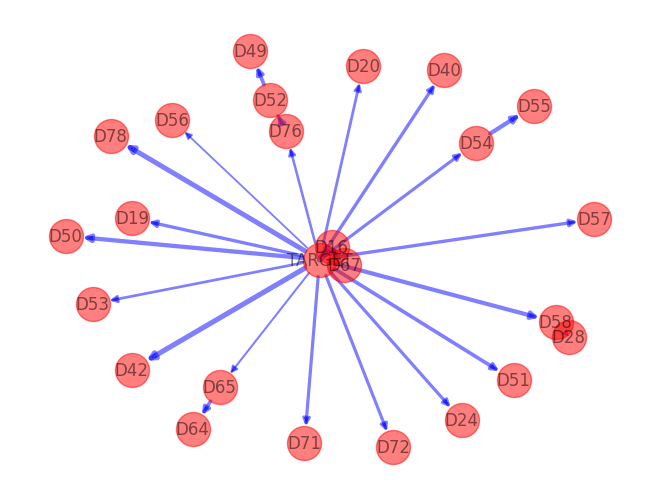

In [22]:
nx.draw(Gtree,node_color='red',with_labels=True, width=dtree.W.values*10,node_size=600,edge_color='blue',alpha=0.5)
# nx.draw(G,node_color='red',with_labels = True,width=dpps.ppscore.values*10,node_size=500,edge_color='blue',alpha=0.5)